## Practica 5: Redes Neuronales en Python
### Grupo5: Jorge Ortega y Daniela Vidal

#### 1. Redes neuronales en Python

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

2023-03-15 14:51:37.152792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 14:51:37.921992: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 14:51:38.063773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 14:51:38.063802: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

Cargamos los datos y los visualizamos

In [88]:
auxX = np.load('data5/X.npy')
auxY = np.load('data5/y.npy')

X = auxX[0:1000,:]
y = auxY[0:1000]

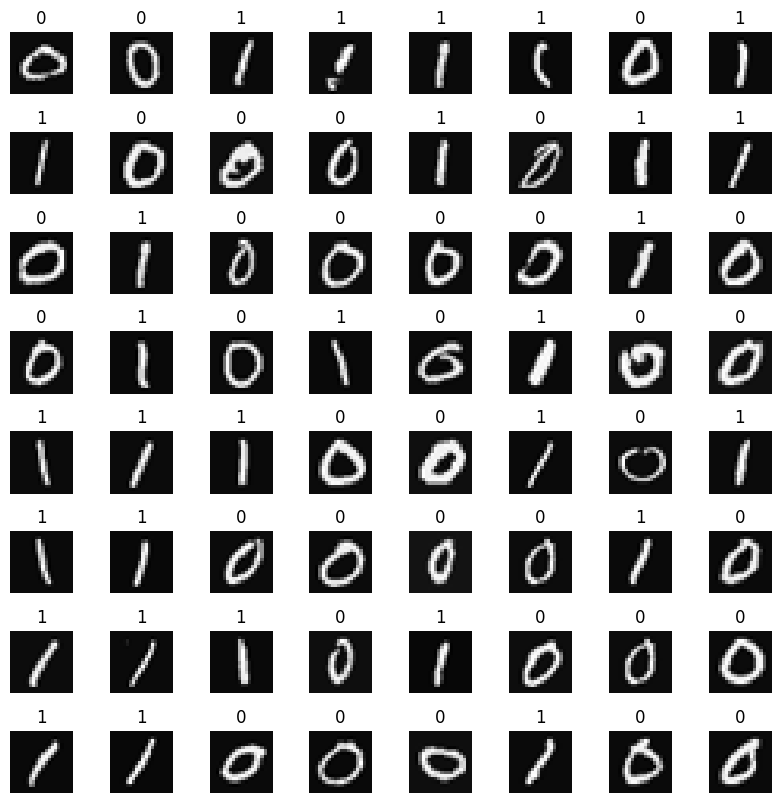

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
       
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [90]:
def func_sigmoide(z):
    return 1/(1+np.exp(-z))

In [91]:
def my_dense(a, W, b):
    a_sol = func_sigmoide(np.matmul(a, W)+b)
    return a_sol

In [92]:
def my_sequential(x, W1, W2, W3, b1, b2, b3):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    a3 = my_dense(a2, W3, b3)
    return a3

In [105]:
model = Sequential([Dense(units = 25, activation = 'sigmoid'), Dense(units = 15, activation = 'sigmoid'), Dense(units = 1, activation = 'sigmoid')])
model.compile(loss =BinaryCrossentropy())
model.fit(X, y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6305
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2095
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1445
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0736
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 13/20
32/32 [==============================

In [106]:
[layer1, layer2, layer3] = model.layers

In [107]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()


In [108]:
predictions = my_sequential(X, W1, W2, W3, b1, b2, b3)
print("Precision: ", np.sum(np.where(predictions >= 0.5, 1, 0) == y)/ len(y)*100, "%")
print("Erroneos: ", np.sum(np.where(predictions >= 0.5, 1, 0) != y), " de ", len(y))

Precision:  99.9 %
Erroneos:  1  de  1000
